# <center> Лабораторная работа № 5</center>
Перед началом выполнения каждой лабораторной работы, необходимо выполнить код в двух ячейках ниже. В случае если модуль `datetime` не установлен нужно установить. В последнем принте, вывести свою фамилию и инициалы.

In [2]:
!whoami

kaneva\ҐЄ вҐаЁ


In [3]:
from datetime import datetime

current_time = datetime.now()
print(current_time)
print("Kaneva E.P.") # написать здесь свою фамилию и инициалы

2022-12-14 22:54:04.758766
Kaneva E.P.


# Задания

**Задание 1.** Создайте любые три датафрейма и объедините их функциями  `pd.concat`, `pd.merge` и `df.join`(т.е. 3-мя способами). Объясните есть ли разница между результатами получеными разными функциями.

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as sps

df1 = pd.DataFrame({
    1: [1, 2, 3, 4],
    2: [5, 6, 7, 8],
    3: [9, 10, 11, 12]
})

df2 = pd.DataFrame({
    4: [13, 14, 15, 16],
    5: [17, 18, 19, 20],
})

df3 = pd.DataFrame({
    7: [21, 22, 23, 24],
})

df_concat = pd.concat([df1, df2, df3], axis = 1)

df_merge = pd.merge(pd.merge(df1, 
                             df2,
                             left_index = True,
                             right_index = True),
                    df3,
                    left_index = True,
                    right_index = True)

df_join = df1.join(df2.join(df3))

In [6]:
df_concat

,1,2,3,4,5,7
0,1,5,9,13,17,21
1,2,6,10,14,18,22
2,3,7,11,15,19,23
3,4,8,12,16,20,24


In [7]:
df_merge

,1,2,3,4,5,7
0,1,5,9,13,17,21
1,2,6,10,14,18,22
2,3,7,11,15,19,23
3,4,8,12,16,20,24


In [8]:
df_join

,1,2,3,4,5,7
0,1,5,9,13,17,21
1,2,6,10,14,18,22
2,3,7,11,15,19,23
3,4,8,12,16,20,24


**Разницы нет.**

**Задание 2.** `pd.DataFrame`, замените случайные 10% элементов на пропуски (`np.nan`), а затем добавьте по столбцу для оценок первых 4 моментов кумулятивно — $$\frac{1}{m} \sum\limits_{i=1}^{m} X_i^{k}, \; i \in \overline{1, m}, \; m \in  \overline{1, n}, \; k \in \overline{1, 4}$$ 
Ваша функция должна корректно обрабатывать пропуски. В конце постройте график.

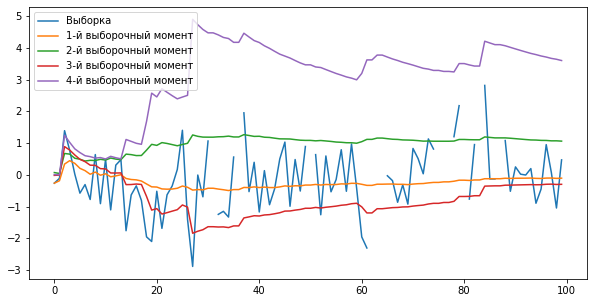

In [11]:
# генерируем выборку
n = 100
sample = sps.norm.rvs(size=n)

# создаем пропуски
index = np.random.choice(np.arange(n), int(0.1 * n), replace=True) # Случайная выборка из значений заданного одномерного массива.
sample[index] = np.nan

# заводим dataframe

# ВАШ КОД
# создайте датафрейм на основе данных выше и задайте название столбцу Выборка 
sample_df =  pd.DataFrame({'Выборка': sample})

# ВАШ КОД
for k in range(1, 5):
    sample_df['{}-й выборочный момент'.format(k)] = (
        sample_df['Выборка'] ** k).expanding().mean()

sample_df.plot(figsize=(10, 5)); # для рисования раскомментируйте строку и добавьте имя вашего датафрейма

In [24]:
df = pd.DataFrame({"B": [2, 1, 2, 5, np.nan, 4]})

In [25]:
df

,B
0,2.0
1,1.0
2,2.0
3,5.0
4,NaN
5,4.0


In [30]:
# пример как работает expanding
df.expanding().sum()

,B
0,2.0
1,3.0
2,5.0
3,10.0
4,10.0
5,14.0


In [104]:
#Функция nanmean() вычисляет среднее арифметическое значений элементов массива, игнорируя значения np.nan.
df.expanding().apply(np.nanmean)

,B
0,2.000000
1,1.500000
2,1.666667
3,2.500000
4,2.500000
5,2.800000


In [106]:
# тот же результат
df.expanding().mean()

,B
0,2.000000
1,1.500000
2,1.666667
3,2.500000
4,2.500000
5,2.800000


**Задание 3.**  Из датафрейма `df_host` ниже, используя функцию `pd.pivot_table` во всех пунктых определите:

3.1. Среднюю зарплату по специальностям.

3.2. По какой специалиности самая высокая средняя зарплата.

3.3. Определите максимальный и минимальный стаж по каждой специальности.

3.4.(доп)* Определите по каждой специальности самого высокооплачиваемого специалиста.

In [13]:
df_host = pd.DataFrame({
    'Специальность' : ['Менеджер', 'Врач', 
                       'Учитель', 'Психолог', 'Повар'] * 6,
    'Специалист' : ['Александр', 'Иван', 'Светлана'] * 10,
    'Стаж' : sps.randint(low=2, high=25).rvs(size=30),
    'Зарплата': sps.randint(low=30000, high=300000).rvs(size=30)
})

In [14]:
df_host

,Специальность,Специалист,Стаж,Зарплата
0,Менеджер,Александр,3,47042
1,Врач,Иван,24,261326
2,Учитель,Светлана,6,217168
3,Психолог,Александр,16,100942
4,Повар,Иван,24,188258
5,Менеджер,Светлана,11,114243
6,Врач,Александр,17,67940
7,Учитель,Иван,20,92083
8,Психолог,Светлана,9,298740
9,Повар,Александр,11,232070


In [16]:
mean_salary = pd.pivot_table(df_host, 
                             index = "Специальность",
                             values = "Зарплата",
                             aggfunc = np.mean)

mean_salary

,Зарплата
Специальность,
Врач,135757.333333
Менеджер,162549.833333
Повар,181266.166667
Психолог,168566.333333
Учитель,189106.500000


In [23]:
mean_salary.columns = ["Средняя зарплата"]

mean_salary[mean_salary["Средняя зарплата"] == max(mean_salary["Средняя зарплата"])]

,Средняя зарплата
Специальность,
Учитель,189106.5


In [27]:
years = pd.pivot_table(df_host,
                       index = "Специальность",
                       values = "Стаж",
                       aggfunc = [min, max])

years

,min,max
,Стаж,Стаж
Специальность,,
Врач,11,24
Менеджер,2,15
Повар,11,24
Психолог,9,22
Учитель,6,22


In [30]:
max_salary = pd.pivot_table(df_host,
                            index = "Специальность",
                            values = "Зарплата",
                            aggfunc = max)

max_salary = pd.merge(max_salary,
                      df_host)

max_salary

,Зарплата,Специальность,Специалист,Стаж
0,282642,Врач,Светлана,11
1,278056,Менеджер,Иван,13
2,232070,Повар,Александр,11
3,298740,Психолог,Светлана,9
4,266628,Учитель,Светлана,13
